            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



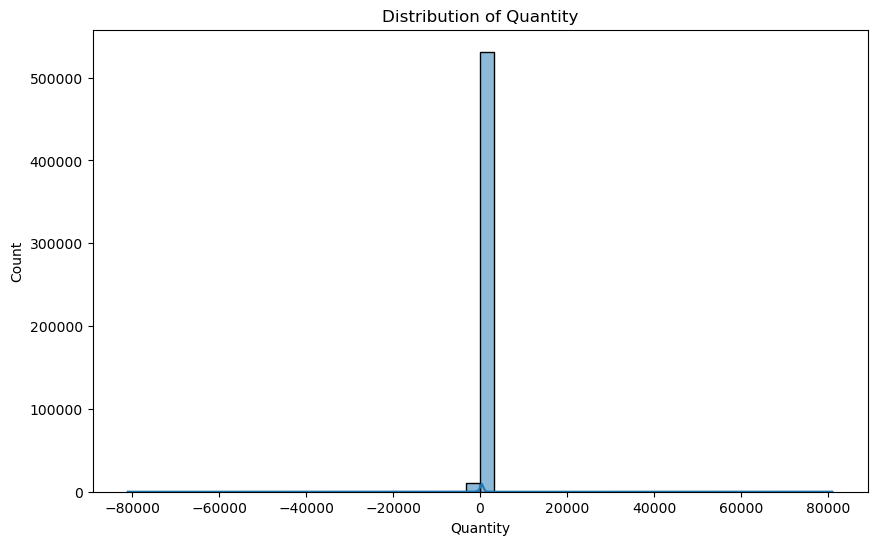

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



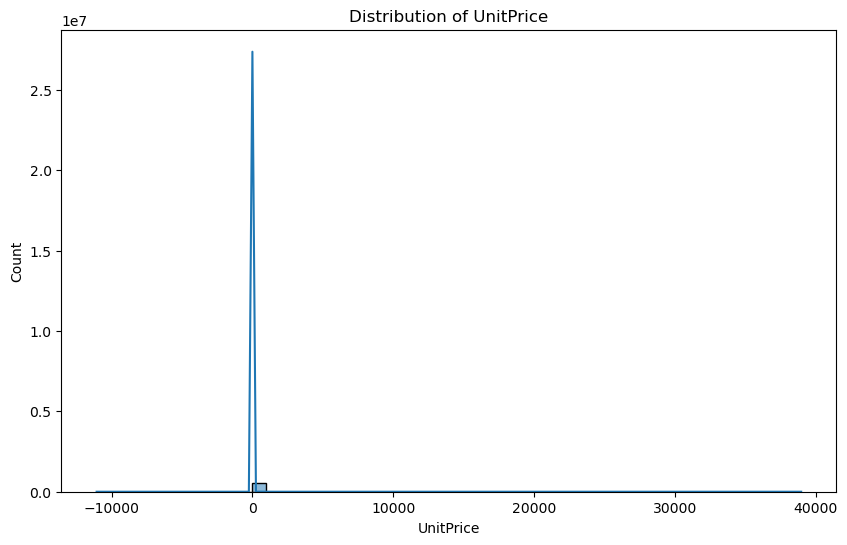

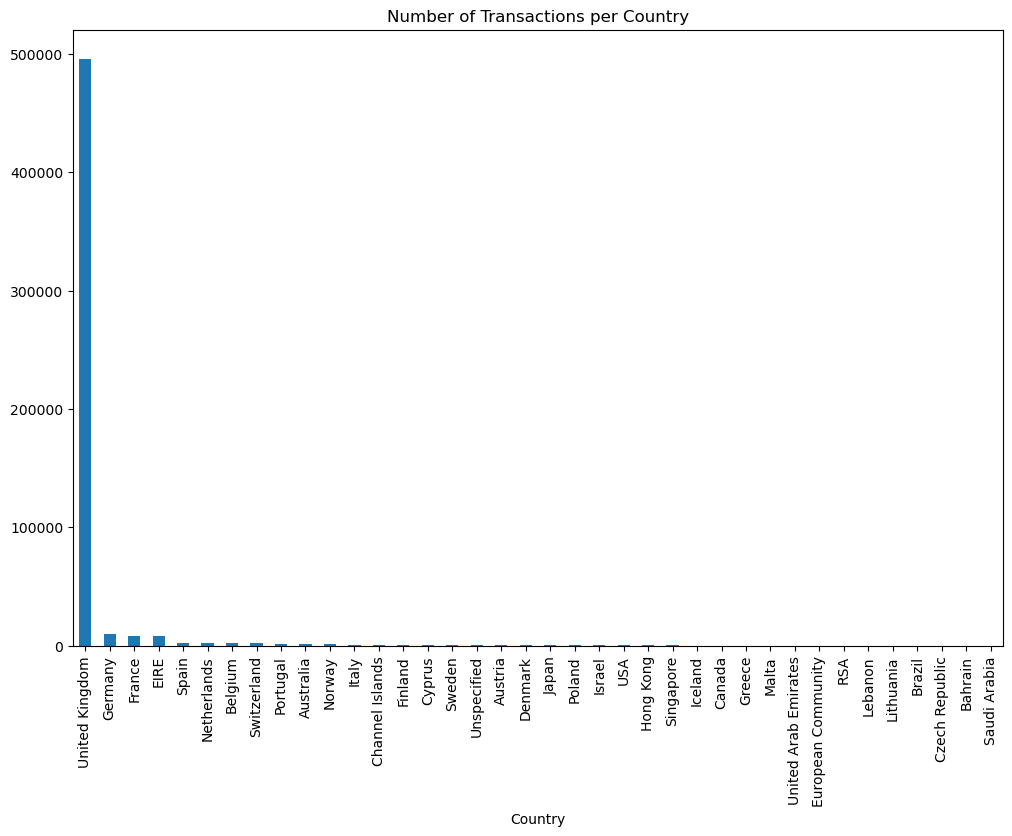

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_i

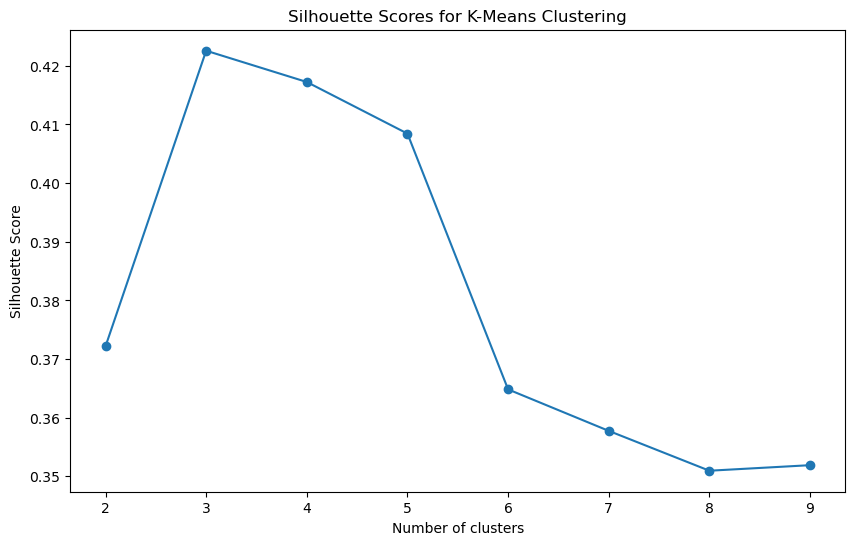

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



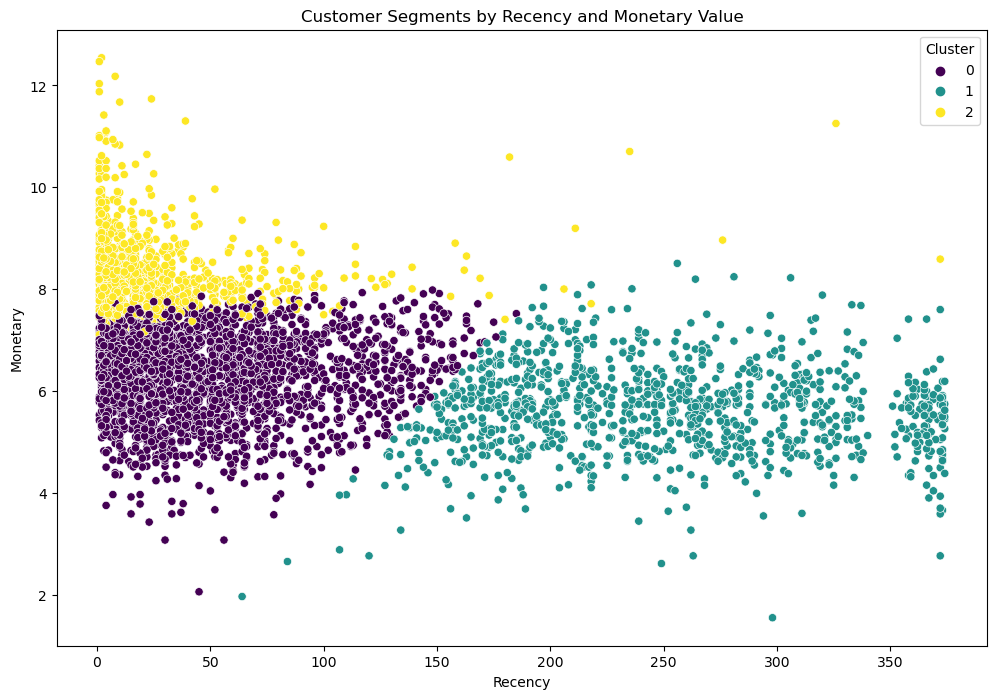

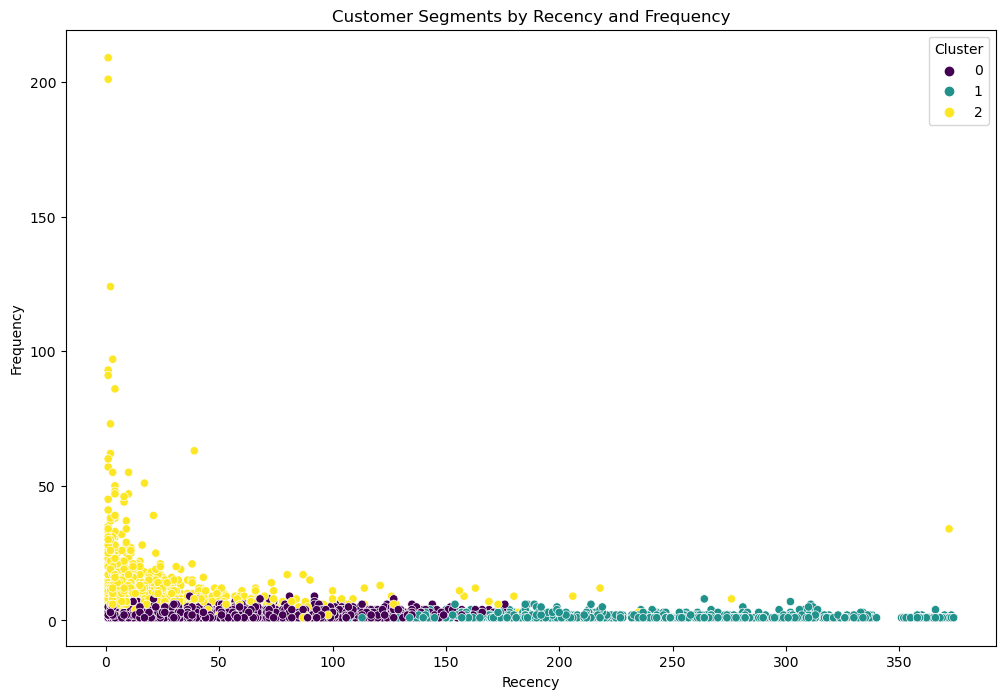

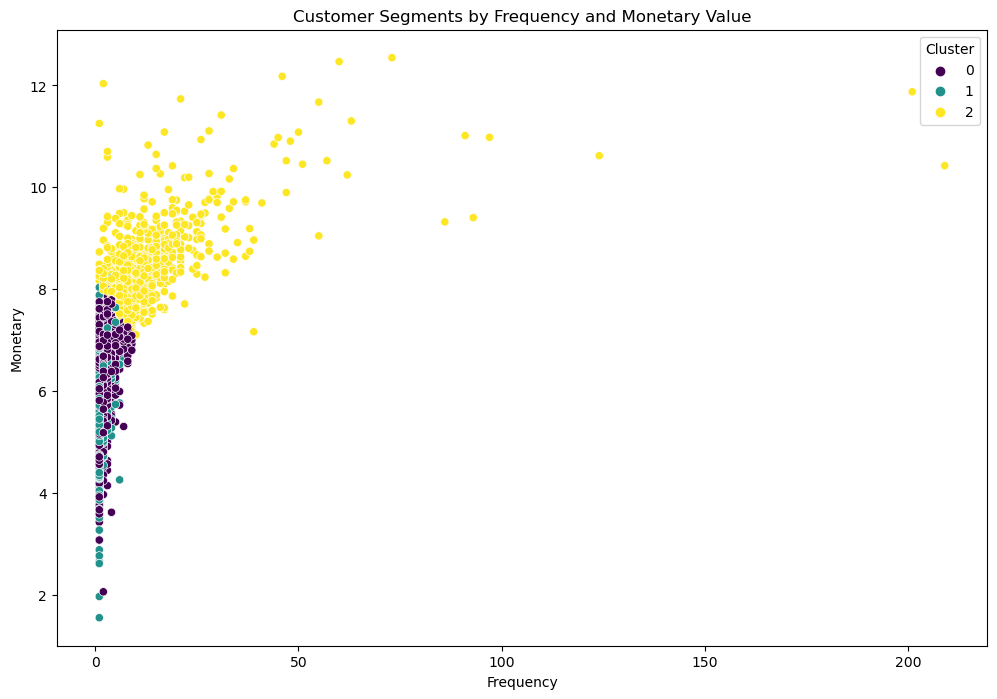

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\Asus\anaconda3\Lib\site-package

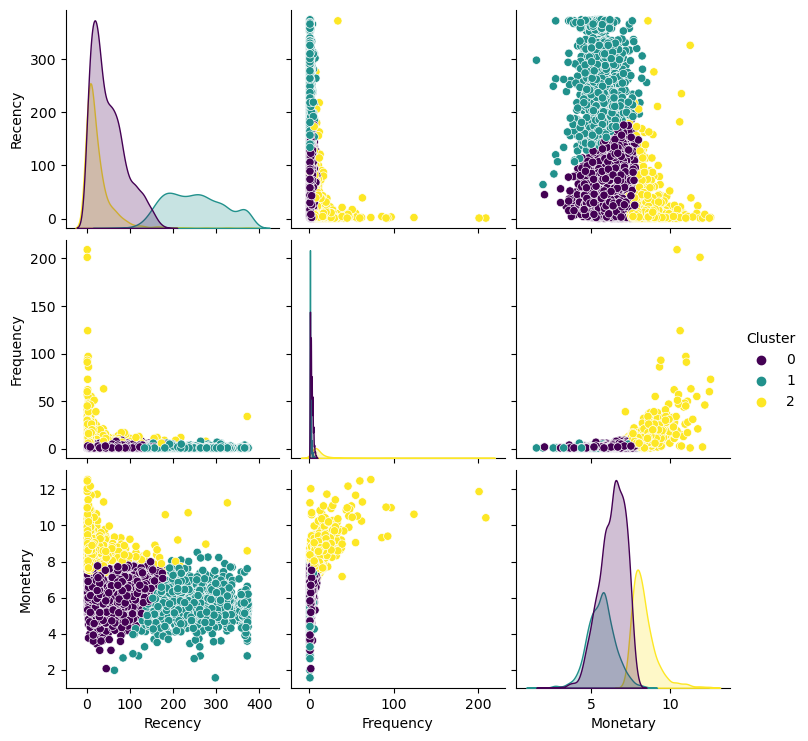

In [40]:
# Data Ingestion
import pandas as pd

# Load dataset with specified encoding
data = pd.read_csv('Online Retail.csv', encoding='ISO-8859-1')

# Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Distribution of Quantity
plt.figure(figsize=(10, 6))
sns.histplot(data['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity')
plt.show()

# Distribution of UnitPrice
plt.figure(figsize=(10, 6))
sns.histplot(data['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of UnitPrice')
plt.show()

# Number of transactions per country
plt.figure(figsize=(12, 8))
data['Country'].value_counts().plot(kind='bar')
plt.title('Number of Transactions per Country')
plt.show()

# Data Preprocessing
# Drop rows with missing CustomerID
data.dropna(subset=['CustomerID'], inplace=True)

# Remove negative or zero quantities and unit prices
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

# Create TotalPrice column
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# RFM Analysis
import datetime as dt

# Define snapshot date
snapshot_date = data['InvoiceDate'].max() + dt.timedelta(days=1)

# Calculate RFM metrics
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})

# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Log transformation
import numpy as np
rfm['Monetary'] = np.log1p(rfm['Monetary'])

# Remove outliers (optional)
rfm = rfm[rfm['Monetary'] > 0]

# Segmentation
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Standardize RFM metrics
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Determine the optimal number of clusters using the silhouette score
silhouette_scores = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(rfm_scaled)
    silhouette_scores.append(silhouette_score(rfm_scaled, kmeans.labels_))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette Scores for K-Means Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Apply K-Means clustering
optimal_clusters = 3  # Choose the optimal number of clusters based on silhouette score
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Visualization
# Visualize clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm, palette='viridis')
plt.title('Customer Segments by Recency and Monetary Value')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Recency', y='Frequency', hue='Cluster', data=rfm, palette='viridis')
plt.title('Customer Segments by Recency and Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Frequency', y='Monetary', hue='Cluster', data=rfm, palette='viridis')
plt.title('Customer Segments by Frequency and Monetary Value')
plt.show()

# Pairplot for a comprehensive view
sns.pairplot(rfm, hue='Cluster', palette='viridis')
plt.show()

# Save the clustered data for Tableau
rfm.to_csv('customer_segments.csv', index=False)
